<font color='red'>TOTAL: 92/100</font>
<br>
<font color='green'>COMMENT: Very well done!</font>

# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 05_Assignment_2.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=05_Assignment_2.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 05_Assignment_2.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [85]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 --- [1 mark] ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [86]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
auto_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 19.9 KB


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.2 --- [1 mark] ==========
Display the first 8 instances of the dataset.

In [87]:
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.3 --- [1 mark] ==========
Display the summary statistics for the dataset.

In [88]:
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.4 --- [2 marks] ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

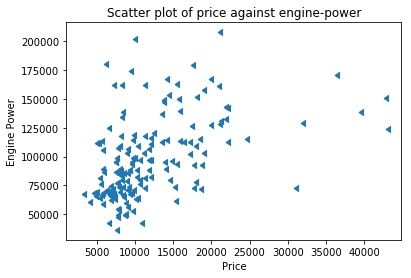

In [123]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)
  
#Plot scatter plot of price against engine power to investigate whether there is any correlation and if
#engine-power is a good predictor of price or not
scatter_jitter(auto_numeric["price"], auto_numeric["engine-power"],  jitter=0.2)
plt.ylabel("Engine Power")
plt.xlabel("Price")
plt.title("Scatter plot of price against engine-power")
plt.show()

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.5 --- [2 marks] ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

Engine power does not appear to have an extremely strong correlation with price, therefore I don't think it is sufficient by itself for predicting price. There appears to be a weak positive correlation which tells us that generally, the higher the engine power, the higher the price. Most of the points are located within the bottom left corner of the graph which tells us that most of the cars have a lower engine power (below around 160000) and most of the cars have a lower price (below 20000). 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.6 --- [2 marks] ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

In [90]:
#using Freedman–Diaconis rule to determine number of bins in histogram

# working out Freedman-Diaconis by 'hand', which I later realised was unnecessary !
IQR = np.percentile(auto_numeric["price"], 0.75) - np.percentile(auto_numeric["price"], 0.25)
priceLength = auto_numeric["price"].shape[0]
binsNo = int(round(2 * (IQR/(priceLength**(1/3)))))

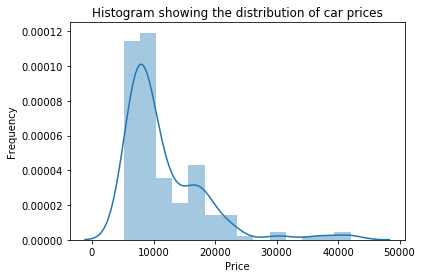

In [91]:
def histogram(data):  
  sns.distplot(data, bins='fd')

#Plotting histogram to visualise price distribution
histogram(auto_numeric["price"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram showing the distribution of car prices")
plt.show()

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.7 --- [2 marks] ==========
How could you preprocess the data to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

Transform the data, e.g normalising and taking the log of the data values, to make the data closer together and easier to fit a better model to. 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.8 --- [1 mark] ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [92]:
X = auto_numeric["engine-power"]
y = auto_numeric["price"]

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.9 --- [1 mark] ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [93]:
#Reshaping X from a 1D array to a 2D array so I can use it in models later on 
xlength = X.shape[0]
X = np.reshape(X, (xlength, 1))

print("The number of instances in the dataset is 159 (from queation 1 there are 159 entries) and the shape" + 
      " of my resulting array is " + str(X.shape))

The number of instances in the dataset is 159 (from queation 1 there are 159 entries) and the shape of my resulting array is (159, 1)


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.10 --- [1 mark] ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.11 --- [2 marks] ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [95]:
linear = LinearRegression(normalize=True)
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.12 --- [2 marks] ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [96]:
print("An equation for predicting the price of a car given the engine-power is " +
      "\ny = " + str(linear.coef_) + " x + " + str(linear.intercept_) + 
     "\nwhere x is the engine-power and y is the predicted price.")

#For the training data, this is the equation:
y = ( linear.coef_ * X_train ) + linear.intercept_

An equation for predicting the price of a car given the engine-power is 
y = [ 0.08988389] x + 2823.1218911
where x is the engine-power and y is the predicted price.


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.13 --- [3 marks] ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

If one more unit of engine power is added, then the price increases by 9p (rounded to nearest penny, or cent - I couldn't find the units!), i.e. it increases by the value of the regression coefficient. The regression coefficient does not determine how important or influential the variable engine-power is on price. The regression coefficient tells you how steep the line is (the gradient) of the joint distribution of two variables; it does not tell you how high the correlation is/how well the point actually fit to this line.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.14 --- [2 marks] ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

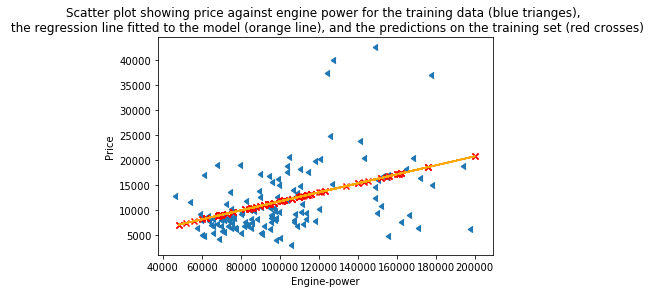

In [97]:
scatter_jitter(X_train, y_train,  jitter=0.2)
y = ( linear.coef_ * X_train ) + linear.intercept_
plt.xlabel("Engine-power")
plt.ylabel("Price")
plt.title("Scatter plot showing price against engine power for the training data (blue trianges), \n the regression"
         " line fitted to the model (orange line), and the predictions on the training set (red crosses)")
plt.plot(X_train, y, color="orange")
plt.scatter(X_train, linear.predict(X_train), color="red", marker="x")
plt.show()

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.15 --- [2 marks] ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

If we have a small dataset, and we hold out some of the data to test on, then we are limiting ourselves eben further in the sense that we will have a very small amount of training data so we might not get a very good model or that accurate a representation of the real world data. 

Also, any error in a point of data in the testing data will result in a much larger testing error than we would like as the number of data points in the testing data set will be very small.  

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.16 --- [1 mark] ==========
Now we want to use k-fold cross-validation to evaluate the performance of the regression model. Famliriase yourself with the sklearn method [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set the `shuffle` parameter to `True` and `random_state` to `0`. Use the object to print the training and validation indices for the `auto_numeric` dataset (hint: see the `split` method).

In [98]:
#Make a 5-cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
ksplit=kfold.split(auto_numeric)

#Print training and validation indices for auto_numeric dataset
def iterator(data):
    for train_index, validation_index in kfold.split(data):
        print("TRAIN:", train_index, "\n\nVALIDATION:", validation_index, "\n\n")        

iterator(auto_numeric)

TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158] 

VALIDATION: [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148] 


TRAIN: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76  77  78  79  81  82  83  84  85
  86  87  88  90  91  92  94 

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.17 --- [3 marks] ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances in each fold.

In [99]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
ksplit=kfold.split(auto_numeric)

#Print training and validation indices for auto_numeric dataset
Price= auto_numeric["price"]
for train_index, validation_index in kfold.split(auto_numeric["price"]):
    print("TRAIN:", np.mean(Price[train_index]))

TRAIN: 11853.2677165
TRAIN: 11635.976378
TRAIN: 11689.8740157
TRAIN: 11709.8267717
TRAIN: 11535.84375


<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.18 --- [3 marks] ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [100]:
#Reminding myself of the X and y arrays
X = auto_numeric["engine-power"]
y = auto_numeric["price"]
xlength = X.shape[0]
X = np.reshape(X, (xlength, 1))

#Initialise a new linear regression
linear2=LinearRegression(normalize=True)

cpredict = cross_val_predict(linear2, X, y, cv=kfold)

if (y.shape==cpredict.shape):
    print("The dimensionality of y is " + str(y.shape) + " and the dimensionality of my prediction is " + 
        str(cpredict.shape) + ". They are equal.")
else:
    print("The dimensionality of y and my predition are not the same.")

The dimensionality of y is (159,) and the dimensionality of my prediction is (159,). They are equal.


<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.19 --- [2 marks] ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [101]:
print("The coefficient of determination (R^2) is " + str(r2_score(y, cpredict)))

mse = mean_squared_error(y, cpredict)
print("\nThe root mean squared error is " + str(np.sqrt(mse)))
print("\nThe mean absolute error is " +str(mean_absolute_error(y, cpredict)))
print("\nThe correlation coefficient is " + str(np.corrcoef(y, cpredict)[0,1]))

The coefficient of determination (R^2) is 0.173005270976

The root mean squared error is 6114.45211862

The mean absolute error is 3987.95779619

The correlation coefficient is 0.417122199043


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.20 --- [4 marks] ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

The correlation coefficient tells us how strong the correlation between some x and y are. It goes from -1 to 1, where 0 means there is no relationship or correlation between x and y, and then the larger the value of the number (whether that be negative or positive), the stronger the correlation, so 1 and -1 are perfect positive and negative correlations respectively. The coefficient of determination is the same kind of measurement, as it is the correlation coefficient squared. Here, the correlation coefficient is around 0.417, so this means that there is some positive correlation/relationship between engine power and price, but that it is quite a low correlation, so as we said in question 1.5, engine power has some relationship to price, but it is not sufficient to predict it alone as the correlation coefficient and coefficient of determination are not very high.

The mean absolute error is the mean of the absolute value of the predicted points from the linear regression model minus the real data points. The root mean squared error the mean of the differences squared, all square rooted. Essentially, these two can be thought of as measures of the error or the difference between the regression line and the actual data, so the better the regression model, the smaller these values will be. Here, both these values are rather large, which again shows that the engine power is not a very good predictor of price by itself.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.21 --- [3 marks] ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

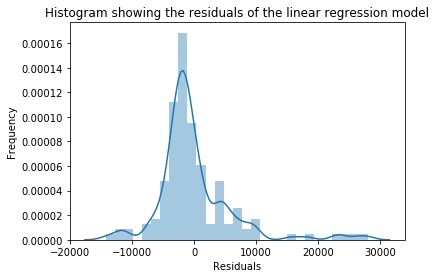

In [102]:
def histogram(data):
   
  ax=sns.distplot(data, bins='fd')
  #ax.set_xlabel(xlabel)
  # ax.set_ylabel(ylabel)
  #  ax.set_title(title)

#Plotting histogram for Price distribution 
histogram(y - cpredict)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram showing the residuals of the linear regression model")
plt.show()

The distribution of residuals looks vaguely like a bell-shaped curve which is what I expected. however, the graph seems to have a little bit of a positive skew meaning that most of the residuals were just below zero, but a few were very high (up to 30000). This is what I expected because the from the scatter plot in question 1.14, we can see that there are some very high outliers where the engine power is above 30000 and the price is also relatively high. These points lie well above the regression line and so in a way 'pull up' the regression line slightly, so that the mode of our residuals lies below zero. 

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.22 --- [2 marks] ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [103]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')

A = auto_base["engine-power"]
Alength = A.shape[0]
A = np.reshape(A, (Alength, 1))

B=auto_base["price"]

linear3=LinearRegression(normalize=True)
cpredict3 = cross_val_predict(linear3, A, B, cv=kfold)

print("The coefficient of determination (R^2) is " + str(r2_score(y, cpredict3)))

mse3 = mean_squared_error(y, cpredict3)
print("\nThe root mean squared error is " + str(np.sqrt(mse3)))
print("\nThe mean absolute error is " +str(mean_absolute_error(y, cpredict3)))
print("\nThe correlation coefficient is " + str(np.corrcoef(y, cpredict3)[0,1]))

The coefficient of determination (R^2) is -0.00213595381121

The root mean squared error is 6730.84360395

The mean absolute error is 4901.86096203

The correlation coefficient is -0.0619144160589


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.23 --- [2 marks] ==========
Show a scatter plot of predicted vs. true prices and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

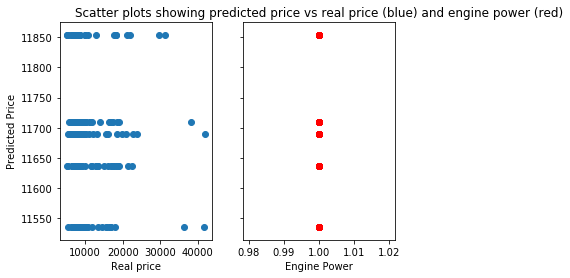

In [104]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.title("Scatter plots showing predicted price vs real price (blue) and engine power (red)")
ax1.scatter(B, cpredict3)
ax2.scatter(A, cpredict3, color="red")
ax1.set_xlabel("Real price")
ax1.set_ylabel("Predicted Price")
ax2.set_xlabel("Engine Power")
plt.show()


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.24 --- [3 marks] ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

The simplest baseline model would just be to take the mean of the values for predicted price and always set the outcome of the model to this value. I just built a linear regreesion model as part of this question. If I used the mean to predict the price, it would simply be a straight horizontal line for predicted price on the y axis and any attribute on the x axis (and a hyperplane if there was more than one attribute). This fits the definition of a linear regression model as it is just a straight line, so using the mean, we would have the equation:
predicted price = 0 * attribute + mean price,
which is just 
predicted price = mean price.
The predictions of this model can be justified given the procedure I followed to train it as I train it using a linear regression model, and the baseline model can also be described as a linear model as I mentioned. 

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.25 --- [2 marks] ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics about the `auto_base` dataset.*)

In [105]:
print(auto_base.describe())
print("\n\n")
auto_numeric.info()

       engine-power         price
count         159.0    159.000000
mean            1.0  11684.723270
std             0.0   6744.910579
min             1.0   5118.000000
25%             1.0   7372.000000
50%             1.0   9233.000000
75%             1.0  14719.500000
max             1.0  42056.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mp

The engine power has mean 1 and std 1 which means that it is ALWAYS 1. However, the price is 
not set at one particular value (it has std ~6700). Therefore, engine-power is awful to use
in a predictor as it will never change so there can be no correlation with price, which does change ! 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 --- [10 marks] ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

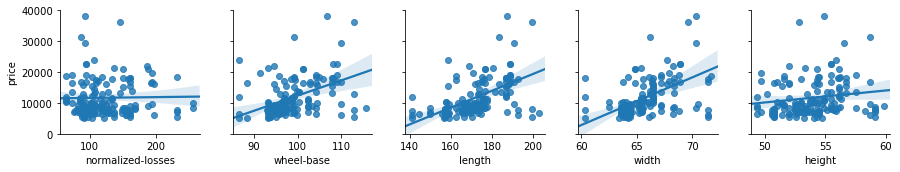

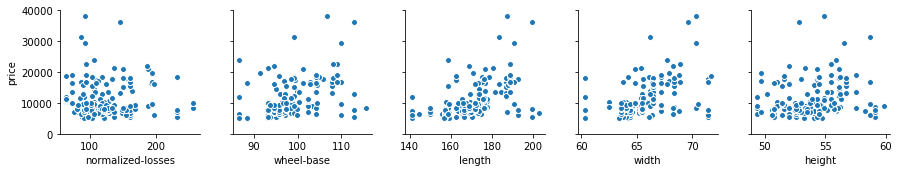

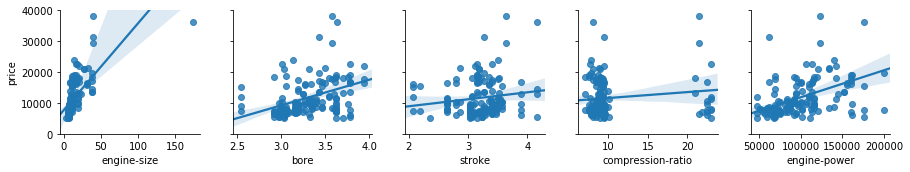

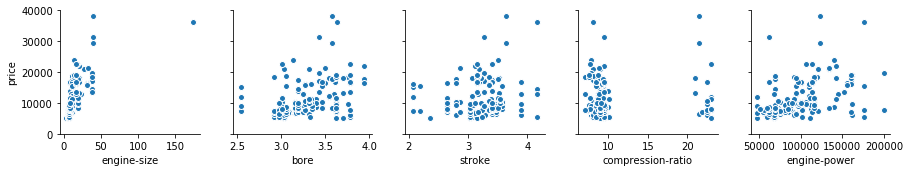

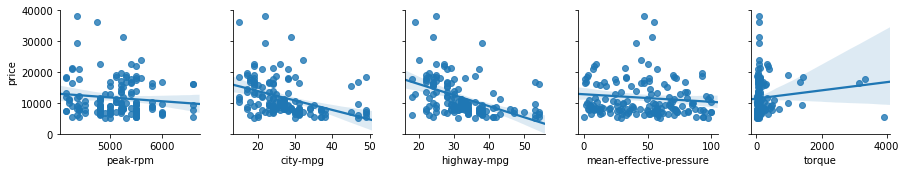

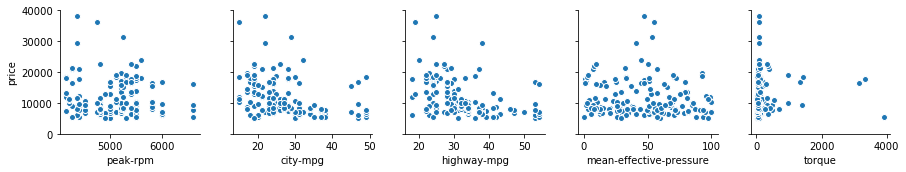

In [106]:
#Creating two pairplots (one with regression line and one as scatter plot) for all the attributes against 
#price and displaying them in rows of 5 so they are #easeier to see. Investigating whether any attributes
#are particularly good or bad at predicting price by visualising their correlations with price
columnLabels = list(auto_numeric)
its = [0,5,10]
for numbers in its:
    sns.pairplot(auto_numeric, x_vars=columnLabels[numbers:numbers+5], y_vars=["price"], kind="reg")
    plt.ylim(0,40000)
    sns.pairplot(auto_numeric, x_vars=columnLabels[numbers:numbers+5], y_vars=["price"], kind="scatter")
    plt.ylim(0,40000)

The compression ratio and torque seem to be useless at predicting the price at their scatterplots do not seem to have any correlation (between these attributes and price). 

Engine-size and width seem particularly good at predicting the price because they seem to have a higher correlation with price than the other attributes. 

Below, I did a pairplot of all of the attributes of auto_numeric against each other. This is so that I could see if there was any significant correlation between any of the attributes.

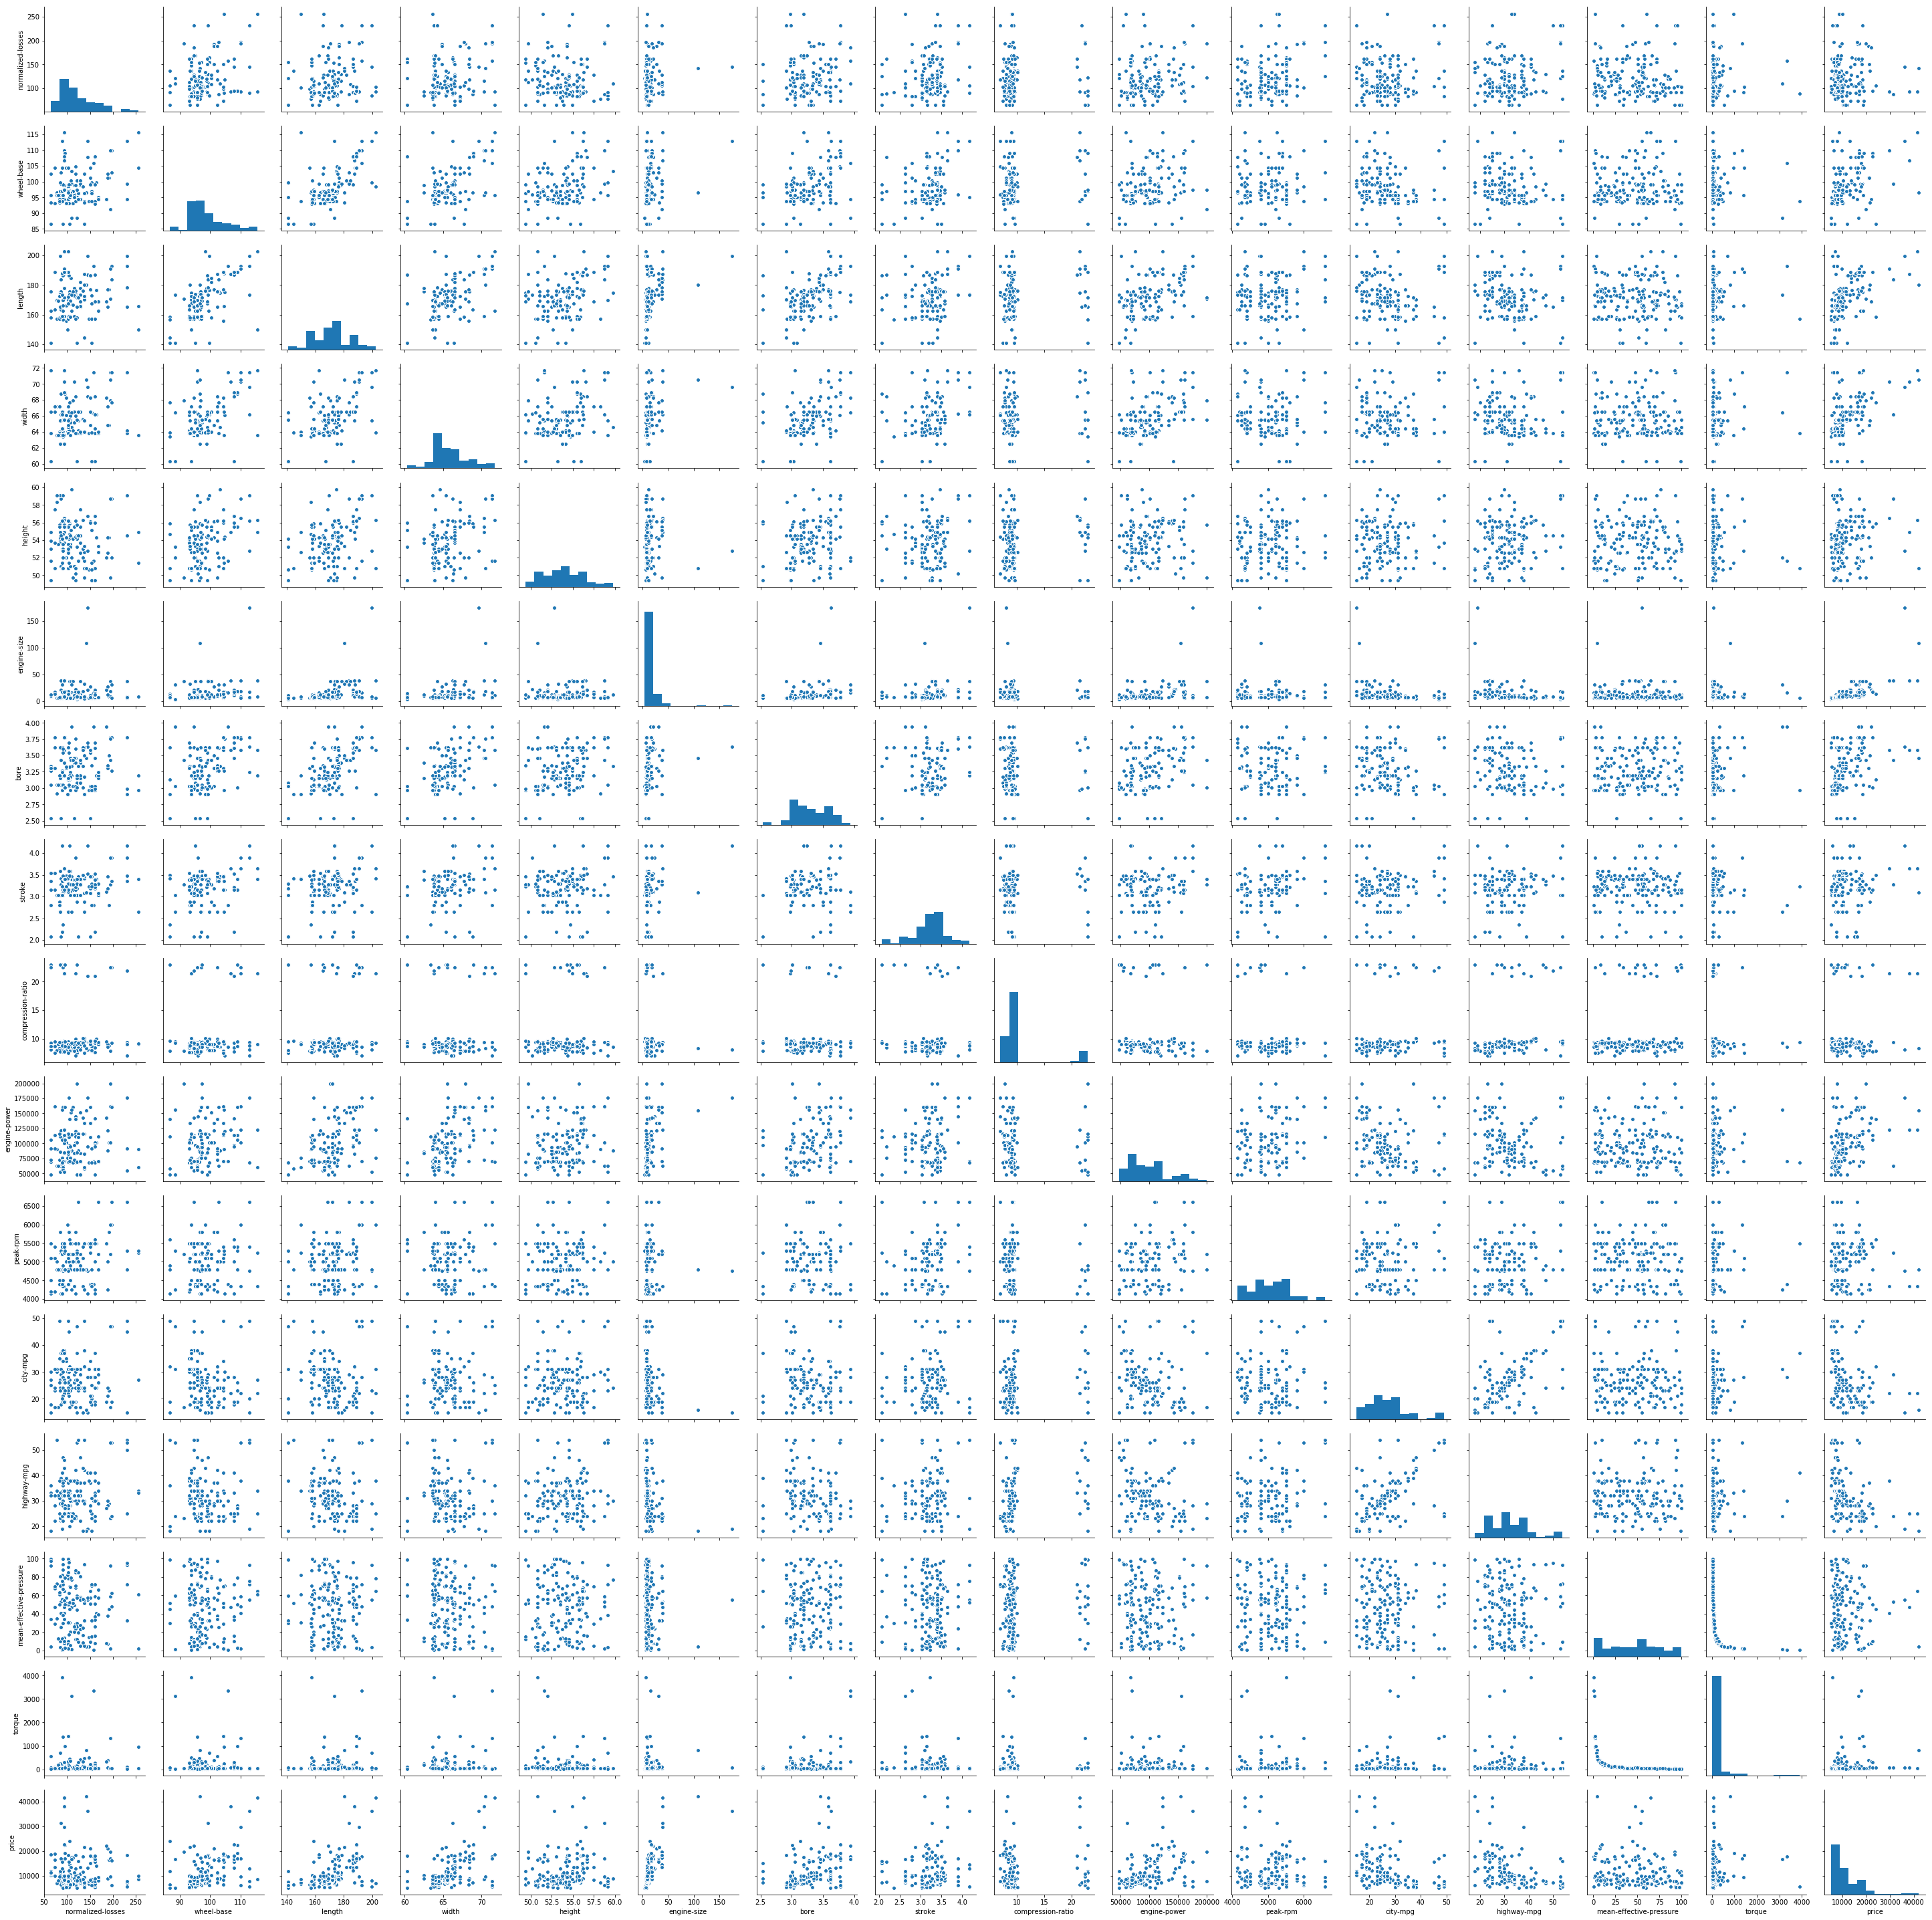

In [107]:
sns.pairplot(auto_numeric)
plt.show()

I selected the above two scatterplots from the selection of pairplots and re-plotted them below as their own scatterplots to enlarge them. I can see there there is some positive correlation between city-mpg and highway-mpg, and also a positive correlation between wheel-base and length. If two attributes have a high correlation, then there is no point keeping both to predict price they will act in roughly the same way. Therefore, it would be safe to remove city-mpg and keep highway-mpg, and it would be safe to remove length and keep wheel-base.

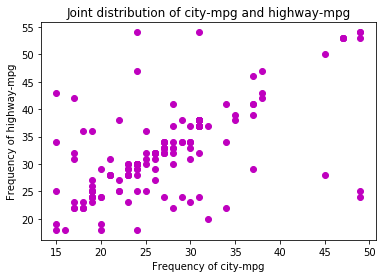

In [108]:
plt.scatter(auto_numeric["city-mpg"], auto_numeric["highway-mpg"], color="m")
plt.xlabel("Frequency of city-mpg")
plt.ylabel("Frequency of highway-mpg")
plt.title("Joint distribution of city-mpg and highway-mpg")
plt.show()

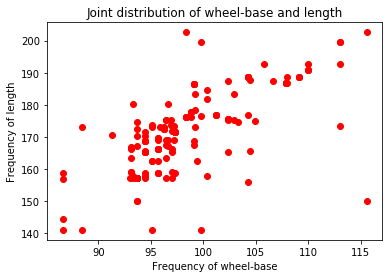

In [109]:
plt.scatter(auto_numeric["wheel-base"], auto_numeric["length"], color="r")
plt.xlabel("Frequency of wheel-base")
plt.ylabel("Frequency of length")
plt.title("Joint distribution of wheel-base and length")
plt.show()

The following two plots I originally plotted when I was first pondering this question, as I was trying to visualise all of the attributes against price on a scatterplot, but I realised that by using pairplots, I could visualise the plots on a more user-friendly and easier scale. I've left the following two plots in simply to show my thought process.  

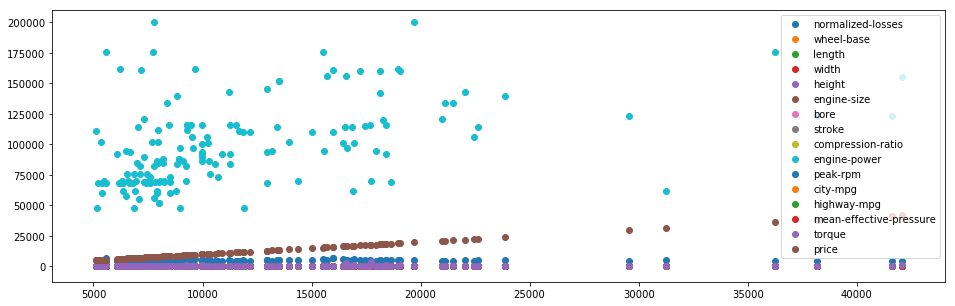

In [110]:
fig = plt.figure(figsize=[16,5])
for columns in auto_numeric:
    plt.scatter(auto_numeric["price"], auto_numeric[columns])
    plt.legend()

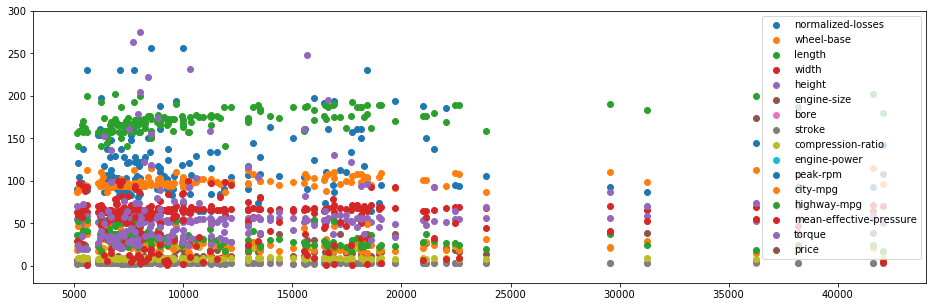

In [111]:
#Englarged version of the above to see the lower valued attributes more clearly
fig2 = plt.figure(figsize=[16,5])
for columns in auto_numeric:
    plt.scatter(auto_numeric["price"], auto_numeric[columns])
    plt.ylim(-20,300)
    plt.legend()

I noticed that in the pairplots, a lot of points were scattered lower down the price axis rather than at higher values for price, so I wanted to check whether this was consistent with the distribution of price and wasn't cause for concern. I plotted a histogram to visualise this and indeed found that most of the price values were distributed between around 5000 and 20000, so there was no need to investigate further. 

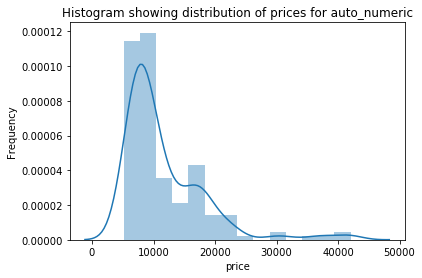

In [112]:
sns.distplot(auto_numeric["price"], bins='fd')
plt.title("Histogram showing distribution of prices for auto_numeric")
plt.ylabel("Frequency")
plt.show()

<font color='red'>TASK MARK: 9</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.2 --- [3 marks] ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [113]:
linear4=LinearRegression(normalize=True)
auto=auto_numeric.copy(deep=True)
auto = auto.drop("price", axis=1)
cpredict4 = cross_val_predict(linear4, auto, auto_numeric["price"], cv=kfold)

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.3 --- [2 marks] ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [114]:
mse4 = mean_squared_error(y, cpredict4)
print("\nThe root mean squared error is " + str(np.sqrt(mse4)))
print("\nThe mean absolute error is " +str(mean_absolute_error(y, cpredict4)))
print("\nThe correlation coefficient is " + str(np.corrcoef(y, cpredict4)[0,1]))


The root mean squared error is 4819.80464283

The mean absolute error is 3050.34459963

The correlation coefficient is 0.742560270537


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.4 --- [2 marks] ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

The root mean squared error with the simple linear regression was around 6114, and with multilinear regression it has decreased to around 4820. This means that there is less error between the data points and the line of regression using the multilinear regression and is a sign that our model has improved. 

The mean absolute error with the simple linear regression was around 3988, and with multilinear regression it has decreased to around 3050. This again confirms that there is less error between the data points and the line of regression using the multilinear regression and is a sign that our model has become more accurate. 

The correlation coefficient with the simple linear regression was around 0.42, and with multilinear regression it has increased to around 0.74. This is a very significant improvement. There is now a relatively strong positive correlation between the attributes and price, whereas when we were only using one attribute, the positive correlation was weak. This again indicates that our model has improved and is now more accurate. 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.5 --- [2 marks] ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

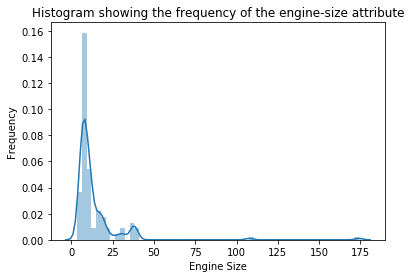

In [115]:
sns.distplot(auto_numeric["engine-size"], bins='fd')
plt.title("Histogram showing the frequency of the engine-size attribute")
plt.ylabel("Frequency")
plt.xlabel("Engine Size")
plt.show()

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.6 --- [2 marks] ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

Yes it is expected to cause a problem for regression. Linear regression is quite sensitive to outliers. With the raw data here, the outliers are very obvious and engine size goes up to just above 175, when we can see that after 50, the points are most likely outliers. These outliers will have a large influence on our regression model if we do not transform the data to minimise the influence of these outliers (by making the data closer together), and we would end up with a worse linear regression model. 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.7 --- [3 marks] ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

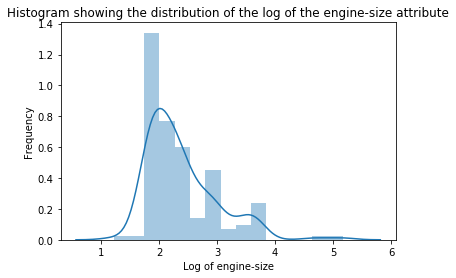

In [116]:
auto["engine-size"] = np.log(auto["engine-size"])
sns.distplot((auto["engine-size"]), bins='fd')
plt.title("Histogram showing the distribution of the log of the engine-size attribute")
plt.xlabel("Log of engine-size")
plt.ylabel("Frequency")
plt.show()

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.8 --- [3 marks] ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [117]:
linear5=LinearRegression(normalize=True)
cpredict5 = cross_val_predict(linear5, auto, auto_numeric["price"], cv=kfold)

print("The coefficient of determination (R^2) is " + str(r2_score(y, cpredict5)))
mse5 = mean_squared_error(y, cpredict5)
print("\nThe root mean squared error is " + str(np.sqrt(mse5)))
print("\nThe mean absolute error is " +str(mean_absolute_error(y, cpredict5)))
print("\nThe correlation coefficient is " + str(np.corrcoef(y, cpredict5)[0,1]))

The coefficient of determination (R^2) is 0.689612268029

The root mean squared error is 3745.91959756

The mean absolute error is 2668.36429567

The correlation coefficient is 0.831675321658


<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.9 --- [3 marks] ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

The root mean squared error and absolute errors have reduced (from 4820 to 3746 and 3050 to 26687 respectively), which means that the data points now lie, on average, closer to the regression line. The correlation coefficient is higher by around 0.09 (it was 0.74 and now is around 0.83). This means that the correlation between the log of the attributes and price is higher when the engine-size data is the log of the data rather than the raw data. The performance of our model has clearly improved as the errors measuring the distance between the data points and the regression line have decreased, and the correlation coefficient has increased. 

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.10 --- [2 marks] ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [118]:
pd.set_option('max_columns', 30)

In [119]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path, delimiter = ',')
auto_full.info(verbose=False)
print("\n\nThere are 159 samples and 27 attributes.")

auto_full.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Columns: 27 entries, normalized-losses to price
dtypes: float64(16), int64(3), object(8)
memory usage: 33.6+ KB


There are 159 samples and 27 attributes.


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.11 --- [3 marks] ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

The categorical variable are all of the string-valued columns, and in this case, also the integer columns. These are the columns with headings: make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system and symboling. We cannot use the nominal attributes in their current form for the purpose of regression because regression uses numerical calculations which cannot be done with categorical variables. 

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.12 --- [5 marks] ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiarise yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [120]:
auto_full_edit=auto_full.copy(deep=True)

#Select columns in auto_full_edit which store object or integer values
categorical = auto_full_edit.select_dtypes(include=["object"])
categorical2 = auto_full_edit.select_dtypes(include=["integer"])

le = LabelEncoder()

#Transform object/string variables using label encoding and print the indexes of the object columns within
#the auto_full_edit dataset
for columns in categorical:
        auto_full_edit[columns] = le.fit_transform(auto_full_edit[columns])
        #print(auto_full_edit.columns.get_loc(columns))
        
#Transform integer variables using label encoding and print the indexes of the integer columns within
#the auto_full_edit dataset
for columns in categorical2:
        auto_full_edit[columns] = le.fit_transform(auto_full_edit[columns])
        #print(auto_full_edit.columns.get_loc(columns))
            
#Create array of the indexes of both objects and integer columns            
categorical_idx = [1,2,3,5,6,7,12,15, 4, 13, 23]


#One-hot Encoding  
ohe = OneHotEncoder(categorical_features=categorical_idx)
X_encoded = ohe.fit_transform(auto_full_edit).toarray()
print(X_encoded.shape)
X_enc = pd.DataFrame(X_encoded[:,:70])
print(X_enc.shape)
X_enc

(159, 71)
(159, 70)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,40.52,57.68
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,47.39,59.59
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,0.85,3344.79
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,44.74,68.97
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,44.78,53.48
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,1.80,1330.28
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,7.19,377.06
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,57.37,48.20
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,121.0,88.4,141.1,60.3,53.2,3.39,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,59.33,25.08
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,98.0,104.3,155.9,68.3,52.0,6.05,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,51.55,36.35


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.13 --- [2 marks] ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [121]:
linear6=LinearRegression(normalize=True)
cpredict6 = cross_val_predict(linear6, X_enc, auto_numeric["price"], cv=kfold)

print("The coefficient of determination (R^2) is " + str(r2_score(y, cpredict6)))
mse6 = mean_squared_error(y, cpredict6)
print("\nThe root mean squared error is " + str(np.sqrt(mse6)))
print("\nThe mean absolute error is " +str(mean_absolute_error(y, cpredict6)))
print("\nThe correlation coefficient is " + str(np.corrcoef(y, cpredict6)[0,1]))

The coefficient of determination (R^2) is -1.90090338099e+24

The root mean squared error is 9.27013799858e+15

The mean absolute error is 1.3956497521e+15

The correlation coefficient is 0.331713319256


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.14 --- [4 marks] ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

My best model out of 2.3 and 2.8 was 2.8 (the multilinear regression model). This more complex model performs a lot worse than the multilinear regression model in 2.8. The root mean squared error and mean abolute error have increased from 3745.91959756 to 9.27013799858e+15 and 2668.36429567 to 1.3956497521e+15 respectively. This means that the points now have, on average, a larger distance between them and the line of regression. 

The correlation coefficient has decreased from around 0.83 to around 0.33. This is a significant decrease. We have gone from a strong positive correlation between the attributes and price, to a weak positive correlation. 

One advantage of using a more complex model is that we can include the categorical variables. 
One disadvantage of using a more complex model is that it is more computationally taxing. We run into the curse of dimensionality because after label encoding and one hot encoding, we have many more columns than we started off with, so we will want more training examples too. If we do this on very large datasets, then we will end up needing more training examples than we are likely to actually have. 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.15 --- [4 marks] ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [122]:
regressor = DecisionTreeRegressor()
cpredict7 = cross_val_predict(regressor, X_enc, auto_numeric["price"], cv=kfold)
print("Values for decision tree regressor:\n")
print("The coefficient of determination (R^2) is " + str(r2_score(y, cpredict7)))
mse7 = mean_squared_error(y, cpredict7)
print("\nThe root mean squared error is " + str(np.sqrt(mse7)))
print("\nThe mean absolute error is " +str(mean_absolute_error(y, cpredict7)))
print("\nThe correlation coefficient is " + str(np.corrcoef(y, cpredict7)[0,1]))


regr = RandomForestRegressor()
cpredict8 = cross_val_predict(regr, X_enc, auto_numeric["price"], cv=kfold)
print("\n\n\nValues for random forest regressor:")
print("\nThe coefficient of determination (R^2) is " + str(r2_score(y, cpredict8)))
mse8 = mean_squared_error(y, cpredict8)
print("\nThe root mean squared error is " + str(np.sqrt(mse8)))
print("\nThe mean absolute error is " +str(mean_absolute_error(y, cpredict8)))
print("\nThe correlation coefficient is " + str(np.corrcoef(y, cpredict8)[0,1]))

Values for decision tree regressor:

The coefficient of determination (R^2) is 0.683417801846

The root mean squared error is 3783.11395064

The mean absolute error is 2392.63522013

The correlation coefficient is 0.843224958826



Values for random forest regressor:

The coefficient of determination (R^2) is 0.818228888881

The root mean squared error is 2866.60998097

The mean absolute error is 1772.70691824

The correlation coefficient is 0.905911458996


The more complex model in question 2.13 performed worse all round. The mean absolute error decreased from the multivariate linear regression model to the decision tree regressor, and the coefficient of determination increased. This indicates that the decision tree regressor is a better classifier than the multivariate linear regression. However, the random forest regressor has the smallest values for both errors out of all the models, and theh highest values of the correlation coefficient and R squared. This shows that with the random forest regressor, the real data points are closest to the line of regression with minimised error (the distance between them and the line). Random forest regression has the highest correlation between attributes and price and therefore, because we can see the performance has improved significantly, it is the best classifier in this problejm.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>